In [4]:
# Hypothesis 1: Coastal cities receive more precipitation than non-coastal cities.

# Independent samples t-test, ANOVA and seaborn will be used to prove/disprove this hypothesis
# The first analysis will be performed on 4 coastal cities and 4 non-coastal cities in close proximity
# The second analysis will be performed on 4 coastal cities and 4 non-coastal cities with considerable distance between them

# Null Hypothesis: Coastal cities do not receive more precipitation than non-coastal cities

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, f_oneway, shapiro, kstest
from netCDF4 import Dataset
import xarray as xr

# First Analysis
# Load the coastal cities' precipitation grid data
coastal_precip_file_paths = {
    'capetown_SA': 'coastal_capetown_SA.nc',
    'lima_peru': 'coastal_lima_peru.nc',
    'sanfrancisco_usa': 'coastal_SF.nc',
    'sydney_australia': 'coastal_sydney_australia.nc'
}

# Load the non-coastal cities' precipitation grid data
# Non-coastal cities chosen because of their close proximity to the coastal cities
non_coastal_precip_file_paths = {
    'worcester_SA': 'noncoastal_worcester_SA.nc',
    'huancayo_peru': 'noncoastal_huancayo_peru.nc',
    'sacramento_usa': 'noncoastal_sacramento.nc',
    'canberra_australia': 'noncoastal_canberra_australia.nc'
}

# view the content of some of the files to better understand their structure
file_path = [coastal_precip_file_paths['sanfrancisco_usa'],
             non_coastal_precip_file_paths['sacramento_usa']]

for each_file in file_path:
    # Open the .nc file in read mode
    nc_file = Dataset(each_file, 'r')

    # Print the first 30 lines of the .nc file
    for var_name in nc_file.variables:
        print(f"{var_name}: {nc_file.variables[var_name][:30]}")
    
# Close the .nc file
nc_file.close()

lon: [236.25 238.75]
time: [1569072. 1569816. 1570488. 1571232. 1571952. 1572696. 1573416. 1574160.
 1574904. 1575624. 1576368. 1577088. 1577832. 1578576. 1579272. 1580016.
 1580736. 1581480. 1582200. 1582944. 1583688. 1584408. 1585152. 1585872.
 1586616. 1587360. 1588032. 1588776. 1589496. 1590240.]
lat: [38.75]
precip: [[[7.02 5.37]]

 [[8.32 6.39]]

 [[2.82 3.46]]

 [[1.68 1.5 ]]

 [[0.94 0.98]]

 [[0.01 0.07]]

 [[0.09 0.26]]

 [[0.1  0.19]]

 [[0.27 0.07]]

 [[3.59 3.02]]

 [[6.04 2.49]]

 [[5.64 4.88]]

 [[4.81 8.84]]

 [[8.7  8.72]]

 [[2.08 2.52]]

 [[2.22 1.77]]

 [[0.6  1.17]]

 [[0.42 0.31]]

 [[0.03 0.47]]

 [[0.   0.04]]

 [[0.08 0.12]]

 [[0.98 0.54]]

 [[0.78 0.83]]

 [[4.11 2.66]]

 [[7.54 6.12]]

 [[3.11 2.03]]

 [[3.56 4.25]]

 [[0.67 0.98]]

 [[0.95 1.02]]

 [[0.04 0.01]]]
lon: [238.75]
time: [1569072. 1569816. 1570488. 1571232. 1571952. 1572696. 1573416. 1574160.
 1574904. 1575624. 1576368. 1577088. 1577832. 1578576. 1579272. 1580016.
 1580736. 1581480. 1582200. 158

In [5]:
# Step 1: Load Data
coastal_files = ['coastal_capetown_SA.nc', 
                 'coastal_lima_peru.nc', 
                 'coastal_SF.nc', 
                 'coastal_sydney_australia.nc']

non_coastal_files = ['noncoastal_worcester_SA.nc',
                     'noncoastal_huancayo_peru.nc',
                     'noncoastal_sacramento.nc',
                     'noncoastal_canberra_australia.nc']

# Load data for coastal and non-coastal cities
coastal_data = [xr.open_dataset(i) for i in coastal_files]
non_coastal_data = [xr.open_dataset(i) for i in non_coastal_files]

# Handle Missing Data
# Replace missing values with NaN for plotting purposes
for coastal_city in coastal_data:
    coastal_city['precip'].values[coastal_city['precip'].values == -9.96921e+36] = np.nan

for non_coastal_city in non_coastal_data:
    non_coastal_city['precip'].values[non_coastal_city['precip'].values == -9.96921e+36] = np.nan

# Exploratory Data Analysis (EDA) to visually understand distributions and patterns
num_coastal_cities = len(coastal_data)
num_non_coastal_cities = len(non_coastal_data)
num_cols = 2
num_rows = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 8))

# Define plot colors
coastal_color = '#1f77b4'  
non_coastal_color = '#d62728'  

for i, (coastal_city, non_coastal_city) in enumerate(zip(coastal_data, non_coastal_data)):
    row = i // num_cols
    col = i % num_cols
    if i < num_coastal_cities and i < num_non_coastal_cities:
        coastal_city_name = coastal_files[i].replace('.nc', '').replace('_', ' ')
        non_coastal_city_name = non_coastal_files[i].replace('.nc', '').replace('_', ' ')
        
        axes[row, col].plot(coastal_city['time'], coastal_city['precip'].mean(axis=(1, 2)),
                            label=coastal_city_name, color=coastal_color, linestyle='-')
        
        axes[row, col].plot(non_coastal_city['time'], non_coastal_city['precip'].mean(axis=(1, 2)),
                            label=non_coastal_city_name, color=non_coastal_color, linestyle='--')
        
        # Set labels and legend
        axes[row, col].set_xlabel('Year', fontsize=12, fontweight='bold')
        axes[row, col].set_ylabel('Average Precipitation (mm)', fontsize=12, fontweight='bold')
        axes[row, col].legend(fontsize=10, loc='upper right').set_title('City', prop={'size': 10, 'weight': 'bold'})
        
        # Set tick label properties
        axes[row, col].tick_params(axis='x', labelsize=10, width=2, length=5)
        axes[row, col].tick_params(axis='y', labelsize=10, width=2, length=5)
        
    else:
        fig.delaxes(axes[row, col])

# Set a single title for all subplots
plt.suptitle('Monthly Average Precipitation Comparison: Coastal vs Non-Coastal Cities in Close Proximity', fontsize=16, fontweight='bold')

plt.tight_layout()

plt.savefig('coastal_vs_noncoastal_close_proximity.png', dpi=300, bbox_inches='tight')

plt.show()



In [6]:
# Define the significance level
alpha = 0.05

# Define the hypothesis
hypothesis = "Coastal cities receive more precipitation than non-coastal cities"

# Define the null hypothesis
null_hypothesis = "Coastal cities receive lower precipitation than non-coastal cities"

# Perform the analysis for one coastal and one non-coastal city at a time
for count, (coastal_city, non_coastal_city) in enumerate(zip(coastal_data, non_coastal_data)):
    # Handle missing data using masked arrays
    coastal_precip = np.ma.masked_values(coastal_city['precip'].mean(axis=(1, 2)), -9.96921e+36)
    non_coastal_precip = np.ma.masked_values(non_coastal_city['precip'].mean(axis=(1, 2)), -9.96921e+36)
    
    # Perform Independent Samples t-test
    t_statistic, p_value_ttest = ttest_ind(coastal_precip, non_coastal_precip)
    
    # Perform ANOVA
    f_statistic, p_value_anova = f_oneway(coastal_precip, non_coastal_precip)
    
    # Print results and conclusion
    coastal_city_name = coastal_files[count].replace('.nc', '').replace('_', ' ')
    non_coastal_city_name = non_coastal_files[count].replace('.nc', '').replace('_', ' ')
    
    print(f"Results for {coastal_city_name} and {non_coastal_city_name}:")
    print(f"Independent Samples t-test: T-Statistic = {t_statistic}, P-Value = {p_value_ttest}")
    print(f"ANOVA: F-Statistic = {f_statistic}, P-Value = {p_value_anova}")
    
    # Check if null hypothesis is rejected
    if p_value_ttest < alpha and p_value_anova < alpha:
        print("Conclusion: Null hypothesis rejected. Coastal cities may receive more precipitation than non-coastal cities ")
    else:
        print("Conclusion: Null hypothesis accepted. Coastal cities may receive lower or same precipitation as non-coastal cities")
    print()


Results for coastal capetown SA and noncoastal worcester SA:
Independent Samples t-test: T-Statistic = 0.0, P-Value = 1.0
ANOVA: F-Statistic = 3.471224672807813e-30, P-Value = 1.0
Conclusion: Null hypothesis accepted. Coastal cities may receive lower or same precipitation as non-coastal cities

Results for coastal lima peru and noncoastal huancayo peru:
Independent Samples t-test: T-Statistic = 0.0, P-Value = 1.0
ANOVA: F-Statistic = 1.055888412551407e-30, P-Value = 1.0
Conclusion: Null hypothesis accepted. Coastal cities may receive lower or same precipitation as non-coastal cities

Results for coastal SF and noncoastal sacramento:
Independent Samples t-test: T-Statistic = 1.4346967037234495, P-Value = 0.15166304236662972
ANOVA: F-Statistic = 2.0583586862795857, P-Value = 0.1516626396094801
Conclusion: Null hypothesis accepted. Coastal cities may receive lower or same precipitation as non-coastal cities

Results for coastal sydney australia and noncoastal canberra australia:
Independe

In [7]:
# Second Analysis

# Load the non-coastal cities' precipitation grid data
# Non-coastal cities chosen based on their considerable distance from coastal cities
far_non_coastal_precip_file_paths = {'johannesburg_SA': 'Non_coastal_Johannesburg_South_Africa.nc',
                                     'iquitos_peru': 'Non_coastal_Iquitos_Peru.nc',
                                     'chicago_usa': 'Non_coastal_Chicago.nc',
                                     'alice_springs_australia': 'Non_coastal_Alice_Springs_Australia.nc'
                                    }

# view the content of some of the files to better understand their structure
nc_file = Dataset(far_non_coastal_precip_file_paths['alice_springs_australia'], 'r')
for var_name in nc_file.variables:
    print(f"{var_name}: {nc_file.variables[var_name][:30]}")
# Close the .nc file
nc_file.close()


lon: [133.75]
time: [1569072. 1569816. 1570488. 1571232. 1571952. 1572696. 1573416. 1574160.
 1574904. 1575624. 1576368. 1577088. 1577832. 1578576. 1579272. 1580016.
 1580736. 1581480. 1582200. 1582944. 1583688. 1584408. 1585152. 1585872.
 1586616. 1587360. 1588032. 1588776. 1589496. 1590240.]
lat: [-23.75]
precip: [[[2.68]]

 [[1.09]]

 [[1.85]]

 [[1.19]]

 [[2.31]]

 [[0.06]]

 [[0.  ]]

 [[0.09]]

 [[0.91]]

 [[0.13]]

 [[1.16]]

 [[0.59]]

 [[0.8 ]]

 [[0.44]]

 [[0.03]]

 [[1.31]]

 [[0.95]]

 [[0.26]]

 [[0.26]]

 [[0.12]]

 [[0.  ]]

 [[1.04]]

 [[0.16]]

 [[0.67]]

 [[3.64]]

 [[0.98]]

 [[0.33]]

 [[0.  ]]

 [[0.25]]

 [[0.2 ]]]


In [8]:
# Step 1: Load Data
far_non_coastal_files = ['Non_coastal_Johannesburg_South_Africa.nc',
                         'Non_coastal_Iquitos_Peru.nc',
                         'Non_coastal_Chicago.nc',
                         'Non_coastal_Alice_Springs_Australia.nc']

# Load data for non-coastal cities
far_non_coastal_data = [xr.open_dataset(i) for i in far_non_coastal_files]

# Handle Missing Data
# Replace missing values with NaN for plotting purposes
for far_non_coastal_city in far_non_coastal_data:
    far_non_coastal_city['precip'].values[far_non_coastal_city['precip'].values == -9.96921e+36] = np.nan

# Exploratory Data Analysis (EDA) to visually understand distributions and patterns
num_far_non_coastal_cities = len(far_non_coastal_data)
num_cols = 2
num_rows = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 8))

for i, (coastal_city, far_non_coastal_city) in enumerate(zip(coastal_data, far_non_coastal_data)):
    row = i // num_cols
    col = i % num_cols
    if i < num_coastal_cities and i < num_far_non_coastal_cities:
        coastal_city_name = coastal_files[i].replace('.nc', '').replace('_', ' ')
        far_non_coastal_city_name = far_non_coastal_files[i].replace('.nc', '').replace('_', ' ')
        
        axes[row, col].plot(coastal_city['time'], coastal_city['precip'].mean(axis=(1, 2)),
                            label=coastal_city_name, color=coastal_color, linestyle='-')
        
        axes[row, col].plot(far_non_coastal_city['time'], far_non_coastal_city['precip'].mean(axis=(1, 2)),
                            label=far_non_coastal_city_name, color=non_coastal_color, linestyle='--')
        
        # Set labels and legend
        axes[row, col].set_xlabel('Year', fontsize=12, fontweight='bold')
        axes[row, col].set_ylabel('Average Precipitation (mm)', fontsize=12, fontweight='bold')
        axes[row, col].legend(fontsize=10, loc='upper right').set_title('City', prop={'size': 10, 'weight': 'bold'})
        
        # Set tick label properties
        axes[row, col].tick_params(axis='x', labelsize=10, width=2, length=5)
        axes[row, col].tick_params(axis='y', labelsize=10, width=2, length=5)
        
    else:
        fig.delaxes(axes[row, col])

# Set a single title for all subplots
plt.suptitle('Monthly Average Precipitation Comparison: Coastal vs Non-Coastal Cities with Considerable Distance', fontsize=16, fontweight='bold')

plt.tight_layout()

plt.savefig('coastal_vs_noncoastal_far_distance.png', dpi=300, bbox_inches='tight')

plt.show()


In [108]:
# Perform the analysis for one coastal and one far_non-coastal city at a time
for count, (coastal_city, far_non_coastal_city) in enumerate(zip(coastal_data, far_non_coastal_data)):
    # Handle missing data using masked arrays
    coastal_precip = np.ma.masked_values(coastal_city['precip'].mean(axis=(1, 2)), -9.96921e+36)
    far_non_coastal_precip = np.ma.masked_values(far_non_coastal_city['precip'].mean(axis=(1, 2)), -9.96921e+36)
    
    # Perform Independent Samples t-test
    t_statistic, p_value_ttest = ttest_ind(coastal_precip, far_non_coastal_precip)
    
    # Perform ANOVA
    f_statistic, p_value_anova = f_oneway(coastal_precip, far_non_coastal_precip)
    
    # Print results and conclusion
    coastal_city_name = coastal_files[count].replace('.nc', '').replace('_', ' ')
    far_non_coastal_city_name = far_non_coastal_files[count].replace('.nc', '').replace('_', ' ')
    
    print(f"Results for {coastal_city_name} and {far_non_coastal_city_name}:")
    print(f"Independent Samples t-test: T-Statistic = {t_statistic}, P-Value = {p_value_ttest}")
    print(f"ANOVA: F-Statistic = {f_statistic}, P-Value = {p_value_anova}")
    
    # Check if null hypothesis is rejected
    if p_value_ttest < alpha and p_value_anova < alpha:
        print("Conclusion: Null hypothesis rejected. Coastal cities may receive more precipitation than non-coastal cities ")
    else:
        print("Conclusion: Null hypothesis accepted. Coastal cities may receive lower or same precipitation as non-coastal cities")
    print()

Results for coastal capetown SA and Non coastal Johannesburg South Africa:
Independent Samples t-test: T-Statistic = -10.381382949446664, P-Value = 3.935948121646112e-24
ANOVA: F-Statistic = 107.77307471204199, P-Value = 3.936015349862225e-24
Conclusion: Null hypothesis rejected. Coastal cities may receive more precipitation than non-coastal cities 

Results for coastal lima peru and Non coastal Iquitos Peru:
Independent Samples t-test: T-Statistic = -26.945331081814015, P-Value = 9.932394291950888e-123
ANOVA: F-Statistic = 726.0506887553231, P-Value = 9.932924694245668e-123
Conclusion: Null hypothesis rejected. Coastal cities may receive more precipitation than non-coastal cities 

Results for coastal SF and Non coastal Chicago:
Independent Samples t-test: T-Statistic = -6.121149039969229, P-Value = 1.2980910987584842e-09
ANOVA: F-Statistic = 37.468480917898255, P-Value = 1.2980812266370164e-09
Conclusion: Null hypothesis rejected. Coastal cities may receive more precipitation than no

In [9]:
# Hypothesis 2: The average monthly temperature in Corpus Christi does not follow a normal distribution
# The Shapiro Wilk test and Kolmogorov-Smirnov test will be used to disprove this hypothesis

# Null Hypothesis: The average monthly temperature in Corpus Christi follows a normal distribution

# Open the .nc file in read mode
nc_file = Dataset('avg_monthly_temp_corpus.nc', 'r')
# Print the first 100 lines of the .nc file
for var_name in nc_file.variables:
    print(f"{var_name}: {nc_file.variables[var_name][:30]}")
# Close the .nc file
nc_file.close()

lon: [262.75]
time: [1297320. 1298064. 1298760. 1299504. 1300224. 1300968. 1301688. 1302432.
 1303176. 1303896. 1304640. 1305360. 1306104. 1306848. 1307520. 1308264.
 1308984. 1309728. 1310448. 1311192. 1311936. 1312656. 1313400. 1314120.
 1314864. 1315608. 1316280. 1317024. 1317744. 1318488.]
lat: [27.75]
air: [[[284.65]]

 [[288.46]]

 [[291.01]]

 [[296.36]]

 [[299.62]]

 [[301.98]]

 [[302.93]]

 [[302.72]]

 [[299.58]]

 [[296.24]]

 [[291.47]]

 [[291.02]]

 [[285.81]]

 [[290.06]]

 [[292.69]]

 [[293.79]]

 [[299.72]]

 [[302.01]]

 [[302.28]]

 [[301.76]]

 [[301.3 ]]

 [[297.1 ]]

 [[292.75]]

 [[291.05]]

 [[292.42]]

 [[291.53]]

 [[291.96]]

 [[295.68]]

 [[300.23]]

 [[301.42]]]


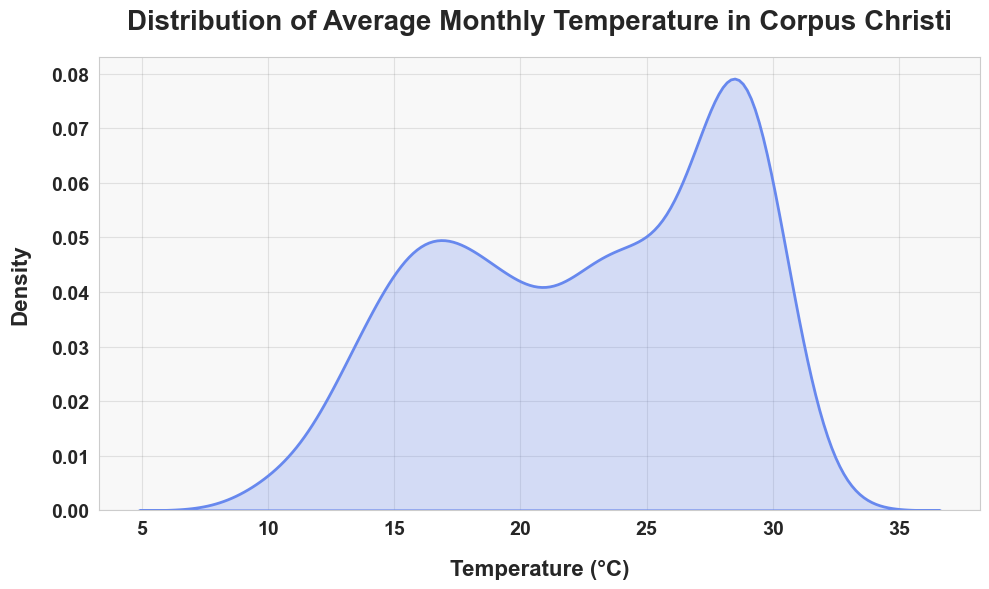

In [10]:
# Load the data
data = xr.open_dataset('avg_monthly_temp_corpus.nc')

# Extract the temperature data
temperature_data = data['air']

# Convert temperature to Celsius
temperature_data_celsius = temperature_data - 273.15

# Create masked array to handle missing data
masked_temperature_data = np.ma.masked_equal(temperature_data_celsius, -9.96921e+36)

# Exploratory Data Analysis (EDA) to visually understand distributions and patterns
plt.figure(figsize=(12, 6))

# Plot average temperature 
plt.plot(data['time'], masked_temperature_data.mean(axis=(1, 2)), 
         linestyle='-', color='b', linewidth=2, 
         label='Average Monthly Temperature')

# Customize plot appearance
plt.title('Average Monthly Temperature in Corpus Christi (1949-2024)', fontsize=16, fontweight='bold', pad=20)  
plt.xlabel('Year', fontsize=14, fontweight='bold', labelpad=15)  
plt.ylabel('Temperature (°C)', fontsize=14, fontweight='bold', labelpad=15)
plt.xticks(fontsize=12, fontweight='bold', rotation=45) 
plt.yticks(fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12, loc='upper left', frameon=False, labelspacing=1, 
           markerscale=1, borderpad=1, handletextpad=2, handlelength=2, 
           edgecolor='black', facecolor='white')

# Apply Seaborn
sns.set_style("whitegrid")

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# horizontal grid lines
plt.gca().yaxis.grid(True)

# background color
plt.gca().set_facecolor('#f7f7f7')

# Show plot
plt.tight_layout()
plt.savefig('corpus_avg_monthly_temp.png', dpi=300, bbox_inches='tight') 
plt.show()


# Flatten the temperature data for visualization
flattened_temperature_data = masked_temperature_data.mean(axis=(1, 2)).compressed()

# Set Seaborn style
sns.set_style("whitegrid")
sns.set_palette("coolwarm")

# Create a kernel density plot to visualize the distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(flattened_temperature_data, linewidth=2, fill=True)

# Customize plot appearance
plt.title('Distribution of Average Monthly Temperature in Corpus Christi', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Temperature (°C)', fontsize=16, fontweight='bold', labelpad=15)
plt.ylabel('Density', fontsize=16, fontweight='bold', labelpad=15)
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.grid(True, linestyle='-', alpha=0.2, color='gray')
plt.gca().set_facecolor('#f8f8f8')

# Show plot
plt.tight_layout()
plt.savefig('corpus_avg_monthly_temp_distribution_kernel.png', dpi=300, bbox_inches='tight')
plt.show()





In [11]:
Hypothesis = "The average monthly temperature in Corpus Christi does not follow a normal distribution"
Null_hypothesis = "The average monthly temperature in Corpus Christi follows a normal distribution"

alpha = 0.05

# Flatten the data for Shapiro-Wilk test
flattened_data = masked_temperature_data.compressed()

# Perform Shapiro-Wilk test
statistic, p_value = shapiro(flattened_data)
print('\nShapiro-Wilk Test:')
print(f'Statistic: {statistic}, p-value: {p_value}')

# Interpret the results
if p_value > alpha:
    print('The data may follow a normal distribution. Null hypothesis accepted.')
else:
    print('The data may not follow a normal distribution. Null hypothesis is rejected.')


Shapiro-Wilk Test:
Statistic: 0.9370886967820665, p-value: 3.444440562604441e-19
The data may not follow a normal distribution. Null hypothesis is rejected.


In [12]:
# Perform Kolmogorov-Smirnov test
statistic_ks, p_value_ks = kstest(flattened_data, 'norm')

print('\nKolmogorov-Smirnov Test:')
print(f'Statistic: {statistic_ks}, p-value: {p_value_ks}')

# Interpret the results
if p_value_ks > alpha:
    print('The data may follow a normal distribution according to Kolmogorov-Smirnov test. Null hypothesis accepted')
else:
    print('The data may not follow a normal distribution according to Kolmogorov-Smirnov test. Null hypothesis rejected')


Kolmogorov-Smirnov Test:
Statistic: 1.0, p-value: 0.0
The data may not follow a normal distribution according to Kolmogorov-Smirnov test. Null hypothesis rejected
